In [204]:
# importing libraries  
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.model_selection import train_test_split
import seaborn as sns 
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
from sklearn import preprocessing
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import confusion_matrix

In [205]:
#Loading Data Using Pandas

In [206]:
data = pd.read_csv('DirectDepositFraud_Data.csv')
print(data.shape)
print(list(data.columns))

(891469, 10)
['Step', 'transactionType', 'Amount', 'startingClient', 'oldBalStartingClient', 'newBalStartingClient', 'destinationClient', 'oldBalDestClient', 'newBalDestClient', 'isfraud']


In [207]:
data.head()

,Step,transactionType,Amount,startingClient,oldBalStartingClient,newBalStartingClient,destinationClient,oldBalDestClient,newBalDestClient,isfraud
0,0,DEPOSIT,19029.53,4633744264492440,81.87,19111.39,92-0000018,0.0,0.0,1
1,0,DEPOSIT,18695.67,4510557354806580,10.16,18705.83,90-0003579,0.0,0.0,1
2,0,DEPOSIT,19614.70,4486709191799490,11472.76,31087.45,99-0004489,0.0,0.0,1
3,0,DEPOSIT,18428.60,4437666409261360,18919.85,37348.45,11-0004423,0.0,0.0,1
4,0,DEPOSIT,18437.70,4716113455799250,14.37,18452.06,56-0008928,0.0,0.0,1


In [208]:
data.shape

(891469, 10)

In [209]:
data['isfraud'].value_counts()

isfraud
0    502797
1    388672
Name: count, dtype: int64

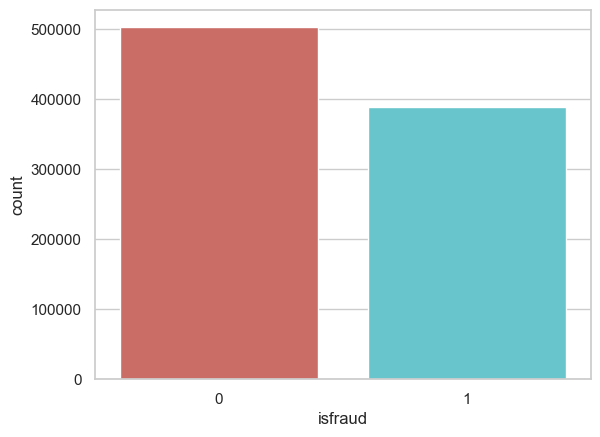

<Figure size 640x480 with 0 Axes>

In [210]:
#Class Composition Check
sns.countplot(x='isfraud',data=data, palette='hls')
plt.show()
plt.savefig('count_plot')

In [211]:
count_no_fraud = len(data[data['isfraud']==0])
count_fraud = len(data[data['isfraud']==1])
pct_of_no_fraud = count_no_fraud/(count_no_fraud+count_fraud)
print("percentage of no fraud is", pct_of_no_fraud*100)
pct_of_fraud = count_fraud/(count_no_fraud+count_fraud)
print("percentage of fraud", pct_of_fraud*100)

percentage of no fraud is 56.40095168760776
percentage of fraud 43.59904831239224


In [212]:
data.groupby('transactionType')['isfraud'].value_counts()

transactionType  isfraud
DEBIT            0            4380
DEPOSIT          1          388672
                 0          315006
PAYMENT          0           80592
TRANSFER         0           20539
WITHDRAWAL       0           82280
Name: count, dtype: int64

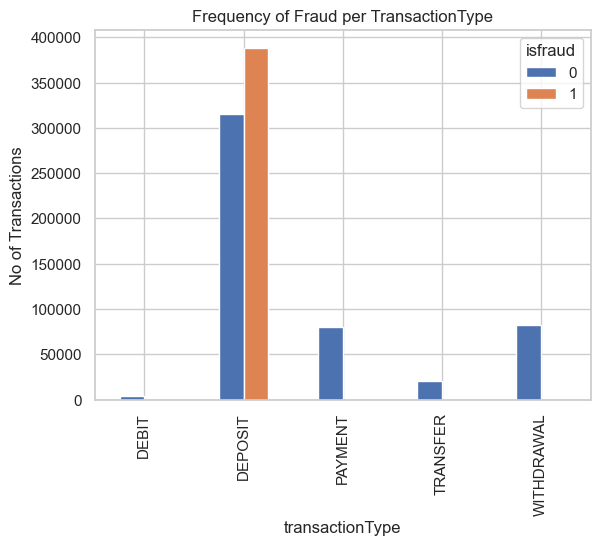

In [213]:
%matplotlib inline
pd.crosstab(data.transactionType,data.isfraud).plot(kind='bar')
plt.title('Frequency of Fraud per TransactionType')
plt.xlabel('transactionType')
plt.ylabel('No of Transactions')
plt.savefig('Action_fraud_istance')

In [214]:
data.columns

Index(['Step', 'transactionType', 'Amount', 'startingClient',
       'oldBalStartingClient', 'newBalStartingClient', 'destinationClient',
       'oldBalDestClient', 'newBalDestClient', 'isfraud'],
      dtype='object')

In [215]:
#FEATURE ENGINEERING

In [216]:
# Calculate the difference between initial and final balances for customer and recipient
data['Customer_balance_change'] = data['newBalStartingClient'] - data['oldBalStartingClient']
data['Recipient_balance_change'] = data['newBalDestClient'] - data['oldBalDestClient']

# Calculate the difference between the transaction amount and customer balance change
data['Amount_vs_customer_balance_change'] = data['Amount'] - data['Customer_balance_change']

# Calculate the difference between the transaction amount and recipient balance change
data['Amount_vs_recipient_balance_change'] = data['Amount'] - data['Recipient_balance_change']

# Calculate the ratio of the transaction amount to the customer's initial balance
#data['Amount_vs_initial_balance'] = data['Amount'] / data['OldBalanceOrig']

# Calculate the ratio of the transaction amount to the recipient's initial balance
#data['Amount_vs_recipient_initial_balance'] = data['Amount'] / data['OldBalanceDest']

# Calculate the ratio of the transaction amount to the customer's final balance
data['Amount_vs_final_balance'] = data['Amount'] / data['newBalStartingClient']

# Calculate the ratio of the transaction amount to the recipient's final balance
data['Amount_vs_recipient_final_balance'] = data['Amount'] / data['newBalDestClient']

# Calculate the time difference between consecutive steps
data['Time_diff'] = data.groupby('startingClient')['Step'].diff()

# Perform any other relevant feature engineering operations based on your domain knowledge

# Print the updated DataFrame with the additional features
#print(data.head())

In [217]:
data.columns

Index(['Step', 'transactionType', 'Amount', 'startingClient',
       'oldBalStartingClient', 'newBalStartingClient', 'destinationClient',
       'oldBalDestClient', 'newBalDestClient', 'isfraud',
       'Customer_balance_change', 'Recipient_balance_change',
       'Amount_vs_customer_balance_change',
       'Amount_vs_recipient_balance_change', 'Amount_vs_final_balance',
       'Amount_vs_recipient_final_balance', 'Time_diff'],
      dtype='object')

In [218]:
print(data.head())

   Step transactionType    Amount    startingClient  oldBalStartingClient   
0     0         DEPOSIT  19029.53  4633744264492440                 81.87  \
1     0         DEPOSIT  18695.67  4510557354806580                 10.16   
2     0         DEPOSIT  19614.70  4486709191799490              11472.76   
3     0         DEPOSIT  18428.60  4437666409261360              18919.85   
4     0         DEPOSIT  18437.70  4716113455799250                 14.37   

   newBalStartingClient destinationClient  oldBalDestClient  newBalDestClient   
0              19111.39        92-0000018               0.0               0.0  \
1              18705.83        90-0003579               0.0               0.0   
2              31087.45        99-0004489               0.0               0.0   
3              37348.45        11-0004423               0.0               0.0   
4              18452.06        56-0008928               0.0               0.0   

   isfraud  Customer_balance_change  Recipient_bal

In [219]:
data.head(5)

,Step,transactionType,Amount,startingClient,oldBalStartingClient,newBalStartingClient,destinationClient,oldBalDestClient,newBalDestClient,isfraud,Customer_balance_change,Recipient_balance_change,Amount_vs_customer_balance_change,Amount_vs_recipient_balance_change,Amount_vs_final_balance,Amount_vs_recipient_final_balance,Time_diff
0,0,DEPOSIT,19029.53,4633744264492440,81.87,19111.39,92-0000018,0.0,0.0,1,19029.52,0.0,1.000000e-02,19029.53,0.995717,inf,NaN
1,0,DEPOSIT,18695.67,4510557354806580,10.16,18705.83,90-0003579,0.0,0.0,1,18695.67,0.0,-3.637979e-12,18695.67,0.999457,inf,NaN
2,0,DEPOSIT,19614.70,4486709191799490,11472.76,31087.45,99-0004489,0.0,0.0,1,19614.69,0.0,1.000000e-02,19614.70,0.630952,inf,NaN
3,0,DEPOSIT,18428.60,4437666409261360,18919.85,37348.45,11-0004423,0.0,0.0,1,18428.60,0.0,0.000000e+00,18428.60,0.493423,inf,NaN
4,0,DEPOSIT,18437.70,4716113455799250,14.37,18452.06,56-0008928,0.0,0.0,1,18437.69,0.0,1.000000e-02,18437.70,0.999222,inf,NaN


In [220]:
# Encoding the transactiontype column to nemerical values

from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object
le = LabelEncoder()

# Fit the encoder to the categorical column
le.fit(data['transactionType'])


# Transform the categorical column to numerical values
data['Action_encoded'] = le.transform(data['transactionType'])


data.head(5)

,Step,transactionType,Amount,startingClient,oldBalStartingClient,newBalStartingClient,destinationClient,oldBalDestClient,newBalDestClient,isfraud,Customer_balance_change,Recipient_balance_change,Amount_vs_customer_balance_change,Amount_vs_recipient_balance_change,Amount_vs_final_balance,Amount_vs_recipient_final_balance,Time_diff,Action_encoded
0,0,DEPOSIT,19029.53,4633744264492440,81.87,19111.39,92-0000018,0.0,0.0,1,19029.52,0.0,1.000000e-02,19029.53,0.995717,inf,NaN,1
1,0,DEPOSIT,18695.67,4510557354806580,10.16,18705.83,90-0003579,0.0,0.0,1,18695.67,0.0,-3.637979e-12,18695.67,0.999457,inf,NaN,1
2,0,DEPOSIT,19614.70,4486709191799490,11472.76,31087.45,99-0004489,0.0,0.0,1,19614.69,0.0,1.000000e-02,19614.70,0.630952,inf,NaN,1
3,0,DEPOSIT,18428.60,4437666409261360,18919.85,37348.45,11-0004423,0.0,0.0,1,18428.60,0.0,0.000000e+00,18428.60,0.493423,inf,NaN,1
4,0,DEPOSIT,18437.70,4716113455799250,14.37,18452.06,56-0008928,0.0,0.0,1,18437.69,0.0,1.000000e-02,18437.70,0.999222,inf,NaN,1


In [221]:
# Fit the encoder to the categorical column

le.fit(data['startingClient'])


# Transform the categorical column to numerical values

data['NameOrig_encoded'] = le.transform(data['startingClient'])


data.head(5)

,Step,transactionType,Amount,startingClient,oldBalStartingClient,newBalStartingClient,destinationClient,oldBalDestClient,newBalDestClient,isfraud,Customer_balance_change,Recipient_balance_change,Amount_vs_customer_balance_change,Amount_vs_recipient_balance_change,Amount_vs_final_balance,Amount_vs_recipient_final_balance,Time_diff,Action_encoded,NameOrig_encoded
0,0,DEPOSIT,19029.53,4633744264492440,81.87,19111.39,92-0000018,0.0,0.0,1,19029.52,0.0,1.000000e-02,19029.53,0.995717,inf,NaN,1,1518
1,0,DEPOSIT,18695.67,4510557354806580,10.16,18705.83,90-0003579,0.0,0.0,1,18695.67,0.0,-3.637979e-12,18695.67,0.999457,inf,NaN,1,1246
2,0,DEPOSIT,19614.70,4486709191799490,11472.76,31087.45,99-0004489,0.0,0.0,1,19614.69,0.0,1.000000e-02,19614.70,0.630952,inf,NaN,1,1185
3,0,DEPOSIT,18428.60,4437666409261360,18919.85,37348.45,11-0004423,0.0,0.0,1,18428.60,0.0,0.000000e+00,18428.60,0.493423,inf,NaN,1,1066
4,0,DEPOSIT,18437.70,4716113455799250,14.37,18452.06,56-0008928,0.0,0.0,1,18437.69,0.0,1.000000e-02,18437.70,0.999222,inf,NaN,1,1729


In [222]:
# Fit the encoder to the categorical column

le.fit(data['destinationClient'])

# Transform the categorical column to numerical values

data['NameDest_encoded'] = le.transform(data['destinationClient'])

data.head(5)

,Step,transactionType,Amount,startingClient,oldBalStartingClient,newBalStartingClient,destinationClient,oldBalDestClient,newBalDestClient,isfraud,Customer_balance_change,Recipient_balance_change,Amount_vs_customer_balance_change,Amount_vs_recipient_balance_change,Amount_vs_final_balance,Amount_vs_recipient_final_balance,Time_diff,Action_encoded,NameOrig_encoded,NameDest_encoded
0,0,DEPOSIT,19029.53,4633744264492440,81.87,19111.39,92-0000018,0.0,0.0,1,19029.52,0.0,1.000000e-02,19029.53,0.995717,inf,NaN,1,1518,2930
1,0,DEPOSIT,18695.67,4510557354806580,10.16,18705.83,90-0003579,0.0,0.0,1,18695.67,0.0,-3.637979e-12,18695.67,0.999457,inf,NaN,1,1246,2924
2,0,DEPOSIT,19614.70,4486709191799490,11472.76,31087.45,99-0004489,0.0,0.0,1,19614.69,0.0,1.000000e-02,19614.70,0.630952,inf,NaN,1,1185,2947
3,0,DEPOSIT,18428.60,4437666409261360,18919.85,37348.45,11-0004423,0.0,0.0,1,18428.60,0.0,0.000000e+00,18428.60,0.493423,inf,NaN,1,1066,41
4,0,DEPOSIT,18437.70,4716113455799250,14.37,18452.06,56-0008928,0.0,0.0,1,18437.69,0.0,1.000000e-02,18437.70,0.999222,inf,NaN,1,1729,2798


In [223]:
print(data['Time_diff'].unique())

[  nan    0.    1.    2.    3.    4.    5.    6.    7.    8.    9.   10.
   11.   12.   14.   15.   16.   17.   19.   18.   20.   21.   13.   25.
   31.   33.   22.   26.   23.   36.   27.   30.   24.   32.   37.   40.
   29.   34.   35.   42.   43.   28.   45.   46.   44.   57.   48.   52.
   51.   38.   50.   54.   55.   60.   53.   39.   59.   41.   61.   68.
   75.   49.   81.   67.   93.   64.   72.   47.   74.   65.   66.   58.
   84.   92.   62.   94.   80.   90.   56.   73.   77.   70.  100.   98.
   89.   63.   76.  103.   83.   79.  119.   82.  120.   71.  133.  123.
   91.   88.   86.  113.   87.  114.   96.   95.  128.  108.  127.  117.
  115.   78.   97.  121.  104.  101.  126.  136.  106.  122.  132.  139.
  105.   99.  102.  109.  111.  118.  147.  116.  144.   69.  143.  152.
  130.  138.  131.  137.  165.  134.  170.  141.  166.  186.  177.  176.
  206.  140.  196.  110.  242.  270.  145.  124.  125.  149.  146.  129.
  189.  169.  316.  151.  178.   85.  160.  155.  1

In [224]:
mean_value = data['Time_diff'].mean()
data['Time_diff'].fillna(mean_value, inplace=True)

In [225]:
#print(data['Amount_vs_recipient_initial_balance'].unique())

In [226]:
max_value = data['Time_diff'].max()
data['Time_diff'].replace([np.inf], max_value, inplace=True)

In [227]:
#max_value = data['Amount_vs_recipient_initial_balance'].max()
#data['Amount_vs_recipient_initial_balance'].replace([np.inf], max_value, inplace=True)

In [228]:
max_value = data['Amount_vs_recipient_final_balance'].max()
data['Amount_vs_recipient_final_balance'].replace([np.inf], max_value, inplace=True)

In [229]:
max_value = data['Amount_vs_final_balance'].max()
data['Amount_vs_final_balance'].replace([np.inf], max_value, inplace=True)

In [230]:
#max_value = data['Amount_vs_initial_balance'].max()
#data['Amount_vs_initial_balance'].replace([np.inf], max_value, inplace=True)

In [231]:
max_value = data['Amount_vs_recipient_balance_change'].max()
data['Amount_vs_recipient_balance_change'].replace([np.inf], max_value, inplace=True)

In [232]:
max_value = data['Amount_vs_customer_balance_change'].max()
data['Amount_vs_customer_balance_change'].replace([np.inf], max_value, inplace=True)

In [233]:
max_value = data['Customer_balance_change'].max()
data['Customer_balance_change'].replace([np.inf], max_value, inplace=True)

In [234]:
max_value = data['Recipient_balance_change'].max()
data['Recipient_balance_change'].replace([np.inf], max_value, inplace=True)

In [235]:
data.columns

Index(['Step', 'transactionType', 'Amount', 'startingClient',
       'oldBalStartingClient', 'newBalStartingClient', 'destinationClient',
       'oldBalDestClient', 'newBalDestClient', 'isfraud',
       'Customer_balance_change', 'Recipient_balance_change',
       'Amount_vs_customer_balance_change',
       'Amount_vs_recipient_balance_change', 'Amount_vs_final_balance',
       'Amount_vs_recipient_final_balance', 'Time_diff', 'Action_encoded',
       'NameOrig_encoded', 'NameDest_encoded'],
      dtype='object')

In [236]:
data.head(5)

,Step,transactionType,Amount,startingClient,oldBalStartingClient,newBalStartingClient,destinationClient,oldBalDestClient,newBalDestClient,isfraud,Customer_balance_change,Recipient_balance_change,Amount_vs_customer_balance_change,Amount_vs_recipient_balance_change,Amount_vs_final_balance,Amount_vs_recipient_final_balance,Time_diff,Action_encoded,NameOrig_encoded,NameDest_encoded
0,0,DEPOSIT,19029.53,4633744264492440,81.87,19111.39,92-0000018,0.0,0.0,1,19029.52,0.0,1.000000e-02,19029.53,0.995717,inf,1.146557,1,1518,2930
1,0,DEPOSIT,18695.67,4510557354806580,10.16,18705.83,90-0003579,0.0,0.0,1,18695.67,0.0,-3.637979e-12,18695.67,0.999457,inf,1.146557,1,1246,2924
2,0,DEPOSIT,19614.70,4486709191799490,11472.76,31087.45,99-0004489,0.0,0.0,1,19614.69,0.0,1.000000e-02,19614.70,0.630952,inf,1.146557,1,1185,2947
3,0,DEPOSIT,18428.60,4437666409261360,18919.85,37348.45,11-0004423,0.0,0.0,1,18428.60,0.0,0.000000e+00,18428.60,0.493423,inf,1.146557,1,1066,41
4,0,DEPOSIT,18437.70,4716113455799250,14.37,18452.06,56-0008928,0.0,0.0,1,18437.69,0.0,1.000000e-02,18437.70,0.999222,inf,1.146557,1,1729,2798


In [237]:
#Getting features and Labels
X= data.drop(columns=['isfraud'])
y=data['isfraud']

In [238]:
#Filling data with mean value incase of Nulls
data['isfraud'].fillna(data['isfraud'].mean(),inplace=True)

In [239]:
#Filling data with mean value incase of Nulls
#data['Amount_vs_initial_balance'].fillna(data['Amount_vs_initial_balance'].mean(),inplace=True)

In [240]:
#Filling data with mean value incase of Nulls
data['Amount_vs_final_balance'].fillna(data['Amount_vs_final_balance'].mean(),inplace=True)

In [241]:
#To verify that no more nulls
data['isfraud'].isna().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of 0         False
1         False
2         False
3         False
4         False
          ...  
891464    False
891465    False
891466    False
891467    False
891468    False
Name: isfraud, Length: 891469, dtype: bool>

In [242]:
# Print the updated DataFrame with the additional features
print(data.head())

   Step transactionType    Amount    startingClient  oldBalStartingClient   
0     0         DEPOSIT  19029.53  4633744264492440                 81.87  \
1     0         DEPOSIT  18695.67  4510557354806580                 10.16   
2     0         DEPOSIT  19614.70  4486709191799490              11472.76   
3     0         DEPOSIT  18428.60  4437666409261360              18919.85   
4     0         DEPOSIT  18437.70  4716113455799250                 14.37   

   newBalStartingClient destinationClient  oldBalDestClient  newBalDestClient   
0              19111.39        92-0000018               0.0               0.0  \
1              18705.83        90-0003579               0.0               0.0   
2              31087.45        99-0004489               0.0               0.0   
3              37348.45        11-0004423               0.0               0.0   
4              18452.06        56-0008928               0.0               0.0   

   isfraud  Customer_balance_change  Recipient_bal

In [243]:
replacement_value = 1e9 
data['Amount_vs_final_balance'].replace([np.inf], replacement_value, inplace=True)

In [244]:
replacement_value = 1e9 
data['Amount_vs_recipient_final_balance'].replace([np.inf], replacement_value, inplace=True)

In [245]:
data.drop(['transactionType','startingClient','destinationClient','Step'], axis=1, inplace=True)

In [246]:
X= data.drop(columns=['isfraud'])
y=data['isfraud']

In [247]:
#CHECKING THE MOST IMPORTANT FEATURES TO BE USED IN THE MODEL

In [248]:
#Dataset splitting in to training and Testing
# test size 30% and train size 70%
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0, solver)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [249]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [250]:
import warnings
warnings.filterwarnings('ignore')

In [251]:
#Feature Selection 
model_lr = LogisticRegression()
recur_fe = RFE(estimator=LogisticRegression(), n_features_to_select=8)
#recur_fe = RFE(model_lr, 3) 
Feature = recur_fe.fit(X,y)
print('Number of Features: %s' % (Feature.n_features_))
print('Selected Features are: %s' % (Feature.support_))
print('Feature Ranking is as follows: %s' % (Feature.ranking_))

Number of Features: 8
Selected Features are: [ True  True  True  True False  True  True  True  True False False False
 False False False]
Feature Ranking is as follows: [1 1 1 1 2 1 1 1 1 8 7 5 6 4 3]


In [252]:
for i, col in zip(range(X.shape[1]), X.columns):
  print(f"{col} selected={recur_fe.support_[i]} rank={recur_fe.ranking_[i]}")

Amount selected=True rank=1
oldBalStartingClient selected=True rank=1
newBalStartingClient selected=True rank=1
oldBalDestClient selected=True rank=1
newBalDestClient selected=False rank=2
Customer_balance_change selected=True rank=1
Recipient_balance_change selected=True rank=1
Amount_vs_customer_balance_change selected=True rank=1
Amount_vs_recipient_balance_change selected=True rank=1
Amount_vs_final_balance selected=False rank=8
Amount_vs_recipient_final_balance selected=False rank=7
Time_diff selected=False rank=5
Action_encoded selected=False rank=6
NameOrig_encoded selected=False rank=4
NameDest_encoded selected=False rank=3


In [253]:
data.columns

Index(['Amount', 'oldBalStartingClient', 'newBalStartingClient',
       'oldBalDestClient', 'newBalDestClient', 'isfraud',
       'Customer_balance_change', 'Recipient_balance_change',
       'Amount_vs_customer_balance_change',
       'Amount_vs_recipient_balance_change', 'Amount_vs_final_balance',
       'Amount_vs_recipient_final_balance', 'Time_diff', 'Action_encoded',
       'NameOrig_encoded', 'NameDest_encoded'],
      dtype='object')

In [254]:
# checking for blank values

data.isna().sum()

Amount                                0
oldBalStartingClient                  0
newBalStartingClient                  0
oldBalDestClient                      0
newBalDestClient                      0
isfraud                               0
Customer_balance_change               0
Recipient_balance_change              0
Amount_vs_customer_balance_change     0
Amount_vs_recipient_balance_change    0
Amount_vs_final_balance               0
Amount_vs_recipient_final_balance     0
Time_diff                             0
Action_encoded                        0
NameOrig_encoded                      0
NameDest_encoded                      0
dtype: int64

In [255]:
# checking for duplicates

data.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
891464    False
891465    False
891466    False
891467    False
891468    False
Length: 891469, dtype: bool

In [256]:
data.iloc[:,1:].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
oldBalStartingClient,891469.0,5.564594e+06,4.950681e+06,-1.604755e+05,3.326517e+06,4.219627e+06,5.806234e+06,8.417834e+07
newBalStartingClient,891469.0,5.561645e+06,4.957265e+06,-1.911609e+05,3.319216e+06,4.211136e+06,5.801252e+06,8.420934e+07
oldBalDestClient,891469.0,1.353825e+06,9.524922e+05,-1.911609e+05,6.482212e+05,1.352422e+06,1.922118e+06,4.667740e+07
newBalDestClient,891469.0,1.372855e+06,1.009798e+06,0.000000e+00,6.558543e+05,1.358414e+06,1.925741e+06,4.722625e+07
isfraud,891469.0,4.359905e-01,4.958861e-01,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00
Customer_balance_change,891469.0,-2.948473e+03,1.790721e+05,-9.516503e+06,1.852875e+04,1.922241e+04,2.348605e+04,5.383295e+05
Recipient_balance_change,891469.0,1.902997e+04,1.650306e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,9.516503e+06
Amount_vs_customer_balance_change,891469.0,6.366629e+04,3.555765e+05,-1.000001e-02,-1.855369e-10,1.309672e-10,1.000000e-02,1.903301e+07
Amount_vs_recipient_balance_change,891469.0,4.168785e+04,1.245297e+05,-1.000000e-02,1.875356e+04,2.034117e+04,2.580885e+04,1.403573e+07
Amount_vs_final_balance,891469.0,2.077502e-02,1.341450e+02,-1.106316e+05,3.220635e-03,5.060290e-03,8.550996e-03,5.862124e+04


In [257]:
#-------------------LOGISTIC REGRESSION MODEL-------------------------------

In [258]:
X= data.drop(columns=['isfraud'])
y=data['isfraud']

In [259]:
#---------Normalizing Data---------------------
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[0.00135577, 0.00190372, 0.00249136, ..., 0.25      , 0.64023619,
        0.98919649],
       [0.00133198, 0.00190287, 0.00248656, ..., 0.25      , 0.52551666,
        0.98717083],
       [0.00139746, 0.00203878, 0.00263326, ..., 0.25      , 0.49978912,
        0.99493585],
       ...,
       [0.00175519, 0.49751549, 0.4978073 , ..., 0.25      , 0.72332349,
        0.03376097],
       [0.00165362, 0.30575145, 0.30616654, ..., 0.25      , 0.59763813,
        0.03106009],
       [0.00133774, 0.19661291, 0.19705523, ..., 0.25      , 0.89962041,
        0.97197839]])

In [260]:
#scalar = MinMaxScaler()
#X_train=scaler.fit_transform(X_train)
#X_test=scaler.fit_transform(X_test)

In [261]:
#Dataset splitting in to training and Testing
# test size 30% and train size 70%
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0, solver)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [262]:
#gridsearch - getting parameters the work for the model 

In [263]:
from sklearn.linear_model import LogisticRegression

#For instance, for Logistic regression, which should be your base model, 
#using liblinear as the solver, regularization: l2 (Ridge) for the penalty 
    #and an adjusted class weight parameter of {0:0.3, 1:0.7}, 
    #which prioritizes class 1 would yield better results for the model.
    
    #Param_grid = [ {'penalty' : ['l1','l2', 'elasticnet', 'none'],
#'C' : np.logspace(-4, 4, 20),
#'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
#'max_iter' : [100,1000,2500,5000]

#logisticR = LogisticRegression(penalty= 'l2',solver = 'liblinear')

LogisticR = LogisticRegression()

LogisticR.fit(X_train,y_train)

LogisticRegression()

In [264]:
#-------------Accuracy Score Metric-----------------------------
y_pred_log = LogisticR.predict(X_test)
# Predict probabilities for the test set
y_pred_probs = LogisticR.predict_proba(X_test)
print("Accuracy score :", round(accuracy_score(y_test, y_pred_log)*100, 2), "%")

Accuracy score : 71.65 %


In [265]:
#from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
#print('F-1 score : ', (f1_score(y_test, y_pred, average='micro')))
#print('Precision score : ', (precision_score(y_test, y_pred, average='micro')))
#print('Recall score : ', (recall_score(y_test, y_pred, average='micro')))

In [266]:
#----------------Matthews Correlation coefficient Metric-------------------------
from sklearn.metrics import f1_score, matthews_corrcoef, confusion_matrix

print(matthews_corrcoef(y_test, y_pred_log))

0.44068559260563184


In [267]:
#----------------------Classification Report------------------------------
from sklearn.metrics import classification_report

# Assuming you have the true labels in y_true and predicted labels in y_pred
# Replace y_true and y_pred with your actual data

# Compute the classification report
report = classification_report(y_test, y_pred_log)

# Print the report
print(report)

              precision    recall  f1-score   support

           0       0.79      0.68      0.73    150841
           1       0.65      0.77      0.70    116600

    accuracy                           0.72    267441
   macro avg       0.72      0.72      0.72    267441
weighted avg       0.73      0.72      0.72    267441



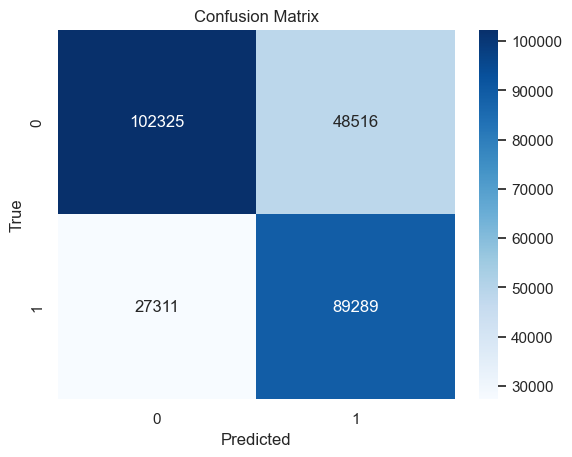

In [268]:
#------------------Confusion Matrix----------------------------------
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Assuming you have the true labels in y_true and predicted labels in y_pred
# Replace y_true and y_pred with your actual data

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred_log)

# Create a heatmap of the confusion matrix using seaborn
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")

# Set labels, title, and axis ticks
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")

# Show the plot
#1 = Fraud, 0 = Not Fraud
plt.show()

In [269]:
cm = confusion_matrix(y_test, y_pred_log)
cm

array([[102325,  48516],
       [ 27311,  89289]], dtype=int64)

In [270]:
#----------------Balanced classification Rate Metric-------------------------
tn, fp, fn, tp = cm.ravel()
n = len(data[data['isfraud']==0])
p = len(data[data['isfraud']==1])

def balancedClassificationRate(tn, fp, fn, tp, p, n):
 return 0.5*(tp/p + tn/n)

"BalancedClassificationRate: {0}".format(balancedClassificationRate(tn, fp, fn, tp, p, n))

'BalancedClassificationRate: 0.2166199824416571'

In [271]:
#----------------Balanced classification Rate Metric_2-------------------------
from sklearn.metrics import balanced_accuracy_score
print(balanced_accuracy_score(y_test, y_pred_log))

0.7220675896750094


In [272]:
#------------NAIVE BAYES MODEL------------------------------

In [273]:
X= data.drop(columns=['isfraud'])
y=data['isfraud']

In [274]:
#scaler = StandardScaler()
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[0.00135577, 0.00190372, 0.00249136, ..., 0.25      , 0.64023619,
        0.98919649],
       [0.00133198, 0.00190287, 0.00248656, ..., 0.25      , 0.52551666,
        0.98717083],
       [0.00139746, 0.00203878, 0.00263326, ..., 0.25      , 0.49978912,
        0.99493585],
       ...,
       [0.00175519, 0.49751549, 0.4978073 , ..., 0.25      , 0.72332349,
        0.03376097],
       [0.00165362, 0.30575145, 0.30616654, ..., 0.25      , 0.59763813,
        0.03106009],
       [0.00133774, 0.19661291, 0.19705523, ..., 0.25      , 0.89962041,
        0.97197839]])

In [275]:
#X_train, X_test, y_train, y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.3, random_state = 42)

In [276]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.naive_bayes import GaussianNB

In [277]:
Gaussian = GaussianNB()
Gaussian.fit(X_train, y_train)

y_pred_Bay = Gaussian.predict(X_test)

In [278]:
y_pred_Bay

array([1, 0, 0, ..., 1, 1, 1], dtype=int64)

In [279]:
y_test

107458    0
205484    0
388970    0
854732    1
41832     0
         ..
90910     0
738267    1
388114    0
886727    1
829502    1
Name: isfraud, Length: 267441, dtype: int64

In [280]:
#-------------Accuracy Score Metric-----------------------------
y_pred_Bay = Gaussian.predict(X_test)
# Predict probabilities for the test set
y_pred_probs = Gaussian.predict_proba(X_test)
print("Accuracy score :", round(accuracy_score(y_test, y_pred_Bay)*100, 2), "%")

Accuracy score : 72.55 %


In [281]:
#from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
#print('F-1 score : ', (f1_score(y_test, y_pred, average='micro')))
#print('Precision score : ', (precision_score(y_test, y_pred, average='micro')))
#print('Recall score : ', (recall_score(y_test, y_pred, average='micro')))

In [282]:
#----------------Matthews Correlation coefficient Metric-------------------------
from sklearn.metrics import f1_score, matthews_corrcoef, confusion_matrix

print(matthews_corrcoef(y_test, y_pred_Bay))

0.5578409551482983


In [283]:
#----------------------Classification Report------------------------------
from sklearn.metrics import classification_report

# Assuming you have the true labels in y_true and predicted labels in y_pred
# Replace y_true and y_pred with your actual data

# Compute the classification report
report = classification_report(y_test, y_pred_Bay)

# Print the report
print(report)

              precision    recall  f1-score   support

           0       0.99      0.52      0.68    150841
           1       0.61      1.00      0.76    116600

    accuracy                           0.73    267441
   macro avg       0.80      0.76      0.72    267441
weighted avg       0.83      0.73      0.71    267441



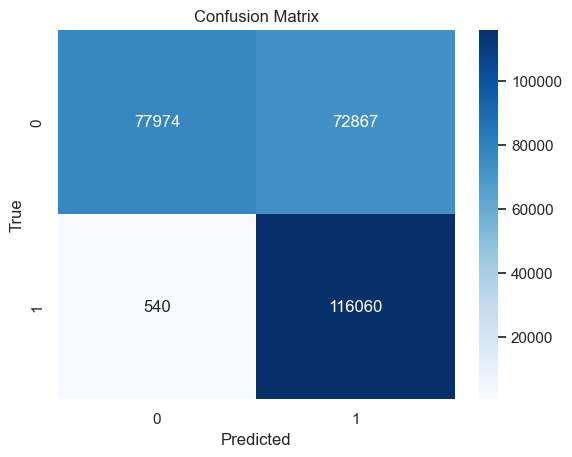

In [284]:
#------------------Confusion Matrix----------------------------------
from sklearn.metrics import confusion_matrix

# Assuming you have the true labels in y_true and predicted labels in y_pred
# Replace y_true and y_pred with your actual data

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred_Bay)

# Create a heatmap of the confusion matrix using seaborn
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")

# Set labels, title, and axis ticks
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")

# Show the plot
#1 = Fraud, 0 = Not Fraud
plt.show()

In [285]:
cm = confusion_matrix(y_test, y_pred_Bay)
cm

array([[ 77974,  72867],
       [   540, 116060]], dtype=int64)

In [286]:
#----------------Balanced classification Rate Metric-------------------------
tn, fp, fn, tp = cm.ravel()
n = len(data[data['isfraud']==0])
p = len(data[data['isfraud']==1])

def balancedClassificationRate(tn, fp, fn, tp, p, n):
 return 0.5*(tp/p + tn/n)

"BalancedClassificationRate: {0}".format(balancedClassificationRate(tn, fp, fn, tp, p, n))

'BalancedClassificationRate: 0.22684350846379348'

In [287]:
#----------------Balanced classification Rate Metric_2-------------------------
from sklearn.metrics import balanced_accuracy_score
print(balanced_accuracy_score(y_test, y_pred_Bay))

0.7561486017395233


In [288]:
#------------K-NEAREST NEIGHBOR MODEL------------------------------------

In [289]:
X= data.drop(columns=['isfraud'])
y=data['isfraud']

In [290]:
#X_train, X_test, y_train, y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [291]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(n_neighbors=5)
KNN.fit(X_train, y_train)

KNeighborsClassifier()

In [292]:
#from sklearn.neighbors import KNeighborsClassifier
#KNN = KNeighborsClassifier(algorithm='auto',leaf_size=30, metric='minkowaki', metric_params=None, n_jobs=None, n_neighbors=5, p=2, weights='uniform')
#KNN.fit(X_train, y_train)

In [293]:
#-------------Accuracy Score Metric-----------------------------
y_pred_knn = KNN.predict(X_test)
# Predict probabilities for the test set
y_pred_probs = KNN.predict_proba(X_test)
print("Accuracy score :", round(accuracy_score(y_test, y_pred_knn)*100, 2), "%")

Accuracy score : 72.65 %


In [294]:
#----------------Matthews Correlation coefficient Metric-------------------------
from sklearn.metrics import f1_score, matthews_corrcoef, confusion_matrix

print(matthews_corrcoef(y_test, y_pred_knn))

0.44763651559599393


In [295]:
#----------------------Classification Report------------------------------
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       0.77      0.74      0.75    150847
           1       0.68      0.71      0.69    116594

    accuracy                           0.73    267441
   macro avg       0.72      0.72      0.72    267441
weighted avg       0.73      0.73      0.73    267441



In [296]:
#print (confusion_matrix(y_test, y_pred))

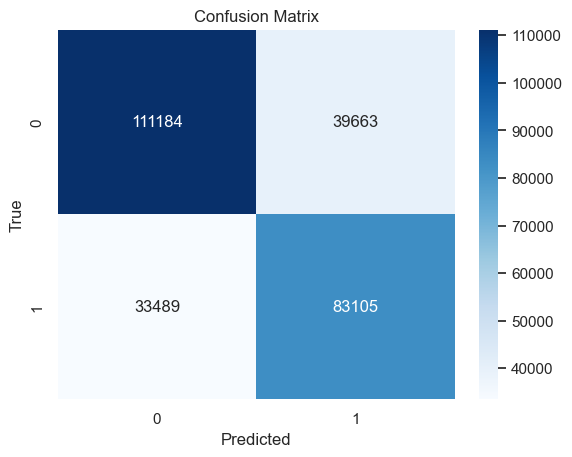

In [297]:
#------------------Confusion Matrix----------------------------------
from sklearn.metrics import confusion_matrix

# Assuming you have the true labels in y_true and predicted labels in y_pred
# Replace y_true and y_pred with your actual data

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred_knn)

# Create a heatmap of the confusion matrix using seaborn
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")

# Set labels, title, and axis ticks
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")

# Show the plot
#1 = Fraud, 0 = Not Fraud
plt.show()

In [298]:
cm = confusion_matrix(y_test, y_pred_knn)
cm

array([[111184,  39663],
       [ 33489,  83105]], dtype=int64)

In [299]:
#----------------Balanced classification Rate Metric-------------------------
tn, fp, fn, tp = cm.ravel()
n = len(data[data['isfraud']==0])
p = len(data[data['isfraud']==1])

def balancedClassificationRate(tn, fp, fn, tp, p, n):
 return 0.5*(tp/p + tn/n)

"BalancedClassificationRate: {0}".format(balancedClassificationRate(tn, fp, fn, tp, p, n))

'BalancedClassificationRate: 0.21747440695280568'

In [300]:
#----------------Balanced classification Rate Metric_2-------------------------
from sklearn.metrics import balanced_accuracy_score
print(balanced_accuracy_score(y_test, y_pred_knn))

0.724918617418645


In [301]:
from sklearn.preprocessing import label_binarize

#y_test_binarized=label_binarize(y_test, classes=np.unique(y_test))

ROC AUC=0.82
ROC AUC=0.74
ROC AUC=0.83


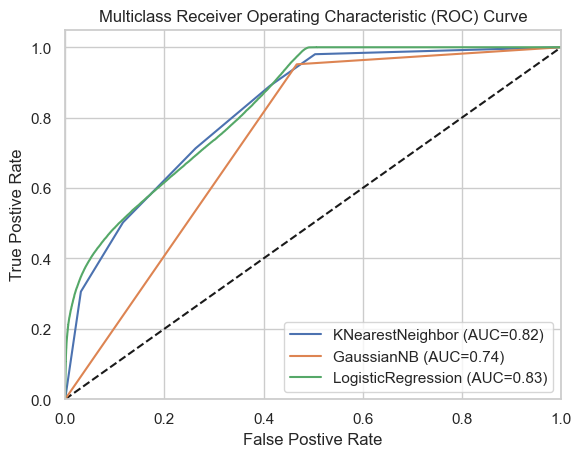

In [302]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

def plot_roc(xtest,ytest,models):

    for name,model in models.items():

        if hasattr(model,'decision_function'):
            probs=model.decision_function(xtest)
        elif hasattr(model,'predict_proba'):
            probs=model.predict_proba(xtest) [:,1]
        fpr,tpr,threshold=roc_curve(ytest,probs)
        roc_auc=auc(fpr,tpr)
        print('ROC AUC=%0.2f'%roc_auc)
        plt.plot(fpr,tpr,label='%s (AUC=%0.2f)'%(name,roc_auc))

#plt.legend(["This is my legend"], fontsize="x-large")
plt.plot([0, 1],[0, 1],'k--')
plt.xlim([0,1])
plt.ylim([0,1.05])
plt.title('Multiclass Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Postive Rate')
plt.ylabel('True Postive Rate')

models={'KNearestNeighbor':KNN, 'GaussianNB':Gaussian, 'LogisticRegression':LogisticR}
plot_roc(X_test, y_test,models)
plt.legend(loc='lower right')

